In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.append('../ga/mpi_scripts/')
from ina_model import InaModel

In [3]:
dirname = '../src/model_ctypes/PC_model/'
filename_so = os.path.join(dirname, 'ina.so')

filename_so_abs = os.path.abspath(filename_so)
Ina = InaModel(filename_so_abs)

In [4]:
legend_algebraic = pd.read_csv('../src/model_ctypes/PC_model/legend_algebraic.csv', index_col='name').value
legend_constants = pd.read_csv('../src/model_ctypes/PC_model/legend_constants.csv', index_col='name').value
legend_states = pd.read_csv('../src/model_ctypes/PC_model/legend_states.csv', index_col='name').value

A = legend_algebraic.copy()
C = legend_constants.copy()
S = legend_states.copy()


In [5]:
df_protocol = pd.read_csv('../data/protocols/activation.csv')
df_initial_state_protocol = pd.read_csv('../data/initial_protocols/activation_initial_state.csv')

In [6]:
df_initial_state_protocol.t

0        0.00000
1        0.00005
2        0.00010
3        0.00015
4        0.00020
          ...   
59995    2.99975
59996    2.99980
59997    2.99985
59998    2.99990
59999    2.99995
Name: t, Length: 60000, dtype: float64

In [7]:
C.c_m = 5e-11
C.R = 5e7

In [8]:
I, I_a = Ina.run(A,
                 S,
                 C,
                 df_protocol, 
                 df_initial_state_protocol, 
                 return_algebraic=True)

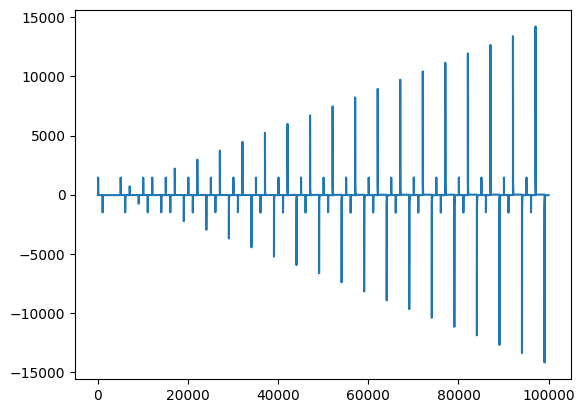

In [28]:
plt.plot(I.I_out)

Text(0.5, 0, 't, s')

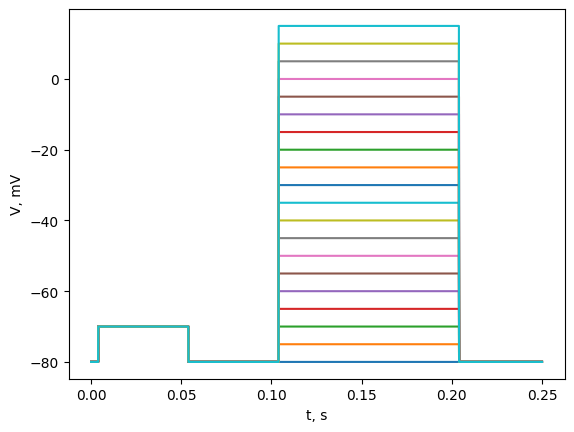

In [15]:
plt.plot(df_protocol.t, df_protocol.drop('t', axis=1))
plt.ylabel('V, mV')
plt.xlabel('t, s')